# Titanic Dataset Problem

In [1]:
### import main packages

import pandas as pd
import numpy as np
from scipy.stats import skew

In [2]:
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
train_df = pd.read_csv('train.csv')
test_df  = pd.read_csv('test.csv')
print(train_df.shape)
print(test_df.shape)

(891, 12)
(418, 11)


In [4]:
train_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [5]:
test_df.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,3.000000,76.000000,8.000000,9.000000,512.329200


##### Fare has a lot of outliers

Text(0, 0.5, 'Frequency of each target category')

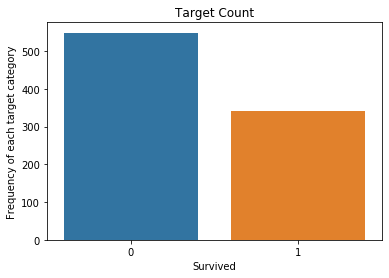

In [6]:
sns.countplot(train_df['Survived'])
plt.title('Target Count')
plt.xlabel('Survived')
plt.ylabel('Frequency of each target category')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001D08B85CA48>,
      dtype=object)

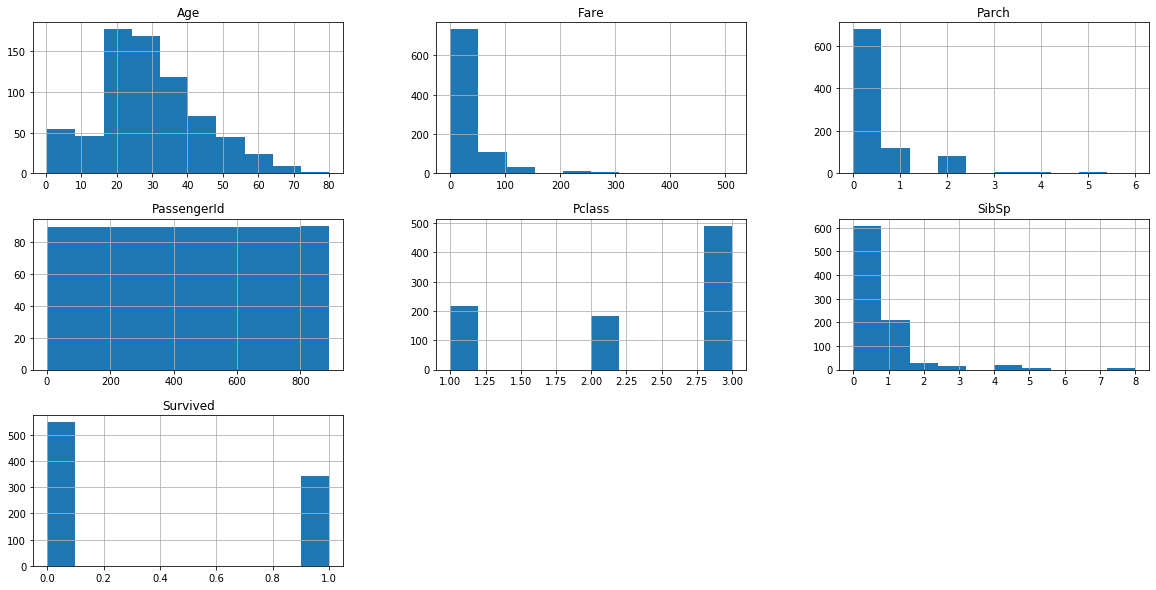

In [7]:
train_df.hist(figsize=(20,10))

In [8]:
### missing values:
round(train_df.isnull().sum()/train_df.shape[0]*100, 2)

PassengerId     0.00
Survived        0.00
Pclass          0.00
Name            0.00
Sex             0.00
Age            19.87
SibSp           0.00
Parch           0.00
Ticket          0.00
Fare            0.00
Cabin          77.10
Embarked        0.22
dtype: float64

In [9]:
### missing values:
round(test_df.isnull().sum()/train_df.shape[0]*100, 2)

PassengerId     0.00
Pclass          0.00
Name            0.00
Sex             0.00
Age             9.65
SibSp           0.00
Parch           0.00
Ticket          0.00
Fare            0.11
Cabin          36.70
Embarked        0.00
dtype: float64

#### can drop 'Cabin' becoz it has missing values >= 70%
will handle "Embarked" and 'Age' by filling with mean

In [10]:
train_df['Age'] = train_df['Age'].fillna(train_df['Age'].mean())
test_df['Age'] = test_df['Age'].fillna(test_df['Age'].mean())
test_df['Fare'] = test_df['Fare'].fillna(test_df['Fare'].mean())

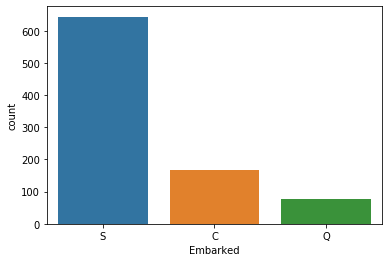

In [11]:
sns.countplot(train_df['Embarked'])

In [12]:
train_df['Embarked'].unique()
train_df['Embarked'] = train_df['Embarked'].replace(np.nan, 'S')

In [13]:
train_df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         0
dtype: int64

In [14]:
test_df.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          327
Embarked         0
dtype: int64

In [15]:
train_df.drop(['Cabin'], axis = 1, inplace = True)
test_df.drop(['Cabin'], axis = 1, inplace = True)

# Normality Check

In [16]:
from scipy.stats import skew

In [17]:
numerical_features   = train_df.select_dtypes(include=np.number).columns
categorical_features = train_df.select_dtypes(include=np.object).columns
print(numerical_features)
print(categorical_features)

Index(['PassengerId', 'Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare'], dtype='object')
Index(['Name', 'Sex', 'Ticket', 'Embarked'], dtype='object')


In [18]:
skew(train_df[numerical_features], nan_policy='omit') ## find out threshold for skewness

array([ 0.        ,  0.47771747, -0.62948588,  0.43375629,  3.68912768,
        2.74448674,  4.77925329])

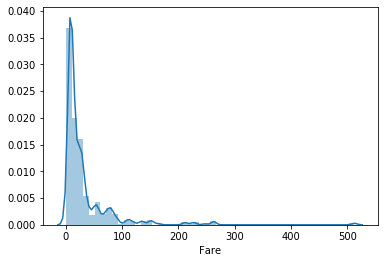

In [19]:
sns.distplot(train_df.Fare)

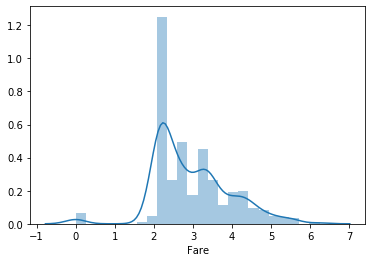

In [20]:
sns.distplot(np.log1p(train_df.Fare)) # log1p -> adds 1 to entire data and then takes log

In [21]:
train_df.Fare = np.log1p(train_df.Fare) # taking log transformation on Fare
test_df.Fare = np.log1p(test_df.Fare)

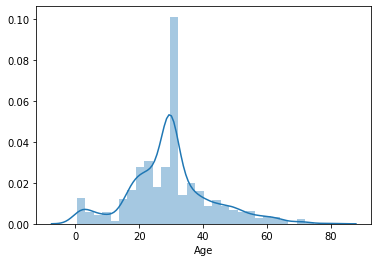

In [22]:
sns.distplot(train_df.Age)
# since age looks balanced, no need to handle for normality 

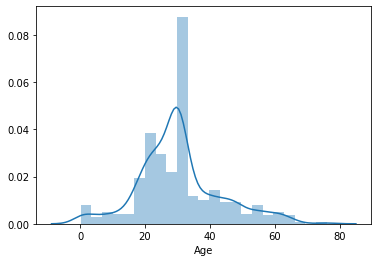

In [23]:
sns.distplot(test_df.Age)

categorical_features 
Index(['Name', 'Sex', 'Ticket', 'Embarked'], dtype='object')

 - drop 'Name', 'Ticket' becoz name is nominal features
 - 'Sex' - handle it replace male with '1' and female with '0'
 - 'Embarked' - handle it but how?
 
 
 Types of encoding
   - Label encoding Ex: {'excellent':3,'good':2, 'bad':1}
   - One hot encoding (OHE) Ex: {'male':1 , 'female:'0}: {'male':001 , 'female':010, 'other':100}

In [24]:
train_df.drop(['Name','Ticket'], axis = 1, inplace = True)
test_df.drop(['Name','Ticket'], axis = 1,inplace = True)

In [25]:
train_df.Sex = train_df.Sex.map({'male':1,'female':0})
test_df.Sex = test_df.Sex.map({'male':1,'female':0})

In [26]:
train_df.Embarked.unique()

array(['S', 'C', 'Q'], dtype=object)

In [27]:
### OHE using pandas get_dummies
train_df_  = pd.get_dummies(train_df, columns=['Pclass','Embarked'])
test_df_   = pd.get_dummies(test_df, columns=['Pclass','Embarked'])

In [28]:
train_df_.head()

,PassengerId,Survived,Sex,Age,SibSp,Parch,Fare,Pclass_1,Pclass_2,Pclass_3,Embarked_C,Embarked_Q,Embarked_S
0,1,0,1,22.0,1,0,2.110213,0,0,1,0,0,1
1,2,1,0,38.0,1,0,4.280593,1,0,0,1,0,0
2,3,1,0,26.0,0,0,2.188856,0,0,1,0,0,1
3,4,1,0,35.0,1,0,3.990834,1,0,0,0,0,1
4,5,0,1,35.0,0,0,2.202765,0,0,1,0,0,1


In [29]:
test_df_.head()

,PassengerId,Sex,Age,SibSp,Parch,Fare,Pclass_1,Pclass_2,Pclass_3,Embarked_C,Embarked_Q,Embarked_S
0,892,1,34.5,0,0,2.178064,0,0,1,0,1,0
1,893,0,47.0,1,0,2.079442,0,0,1,0,0,1
2,894,1,62.0,0,0,2.369075,0,1,0,0,1,0
3,895,1,27.0,0,0,2.268252,0,0,1,0,0,1
4,896,0,22.0,1,1,2.586824,0,0,1,0,0,1


### Bivariate analysis
- Correlation check/multi-collinearity check
- Pair-plot
- Scatter plot
- Outliers handling

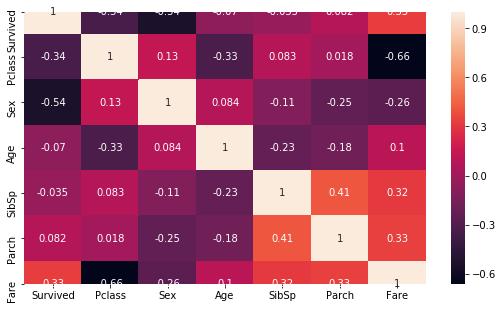

In [30]:
### correlation
plt.figure(figsize=(9,5))
sns.heatmap(train_df.drop('PassengerId', axis = 1).corr(), annot=True)

###  - Fare & Pclass are having higher correlation comparitively
  - drop??

#####  what to do if two features are strongly correlated??
  - remove of the features

 Is it good if any feature is strongly correlated with target variable?
 yes

 What if among features A, B, ....Z, A is correlated with B, B is correlated with E, E is correlated with F, 
 F is correlated with A ?
 - multi-collinearity
 - handling through VIF check ; if VIF > 5, remove that feature

In [31]:
train_df_['age_0_18']  = train_df_['Age'].apply(lambda x: 1 if x<=18 else 0 )
train_df_['age_18_40']  = train_df_['Age'].apply(lambda x: 1 if ((x>18) & (x<=40)) else 0 )
train_df_['age_40_60']  = train_df_['Age'].apply(lambda x: 1 if ((x<40) & (x<=60)) else 0 )
train_df_['age_gr_60']  = train_df_['Age'].apply(lambda x: 1 if x>60 else 0 )

In [32]:
test_df_['age_0_18']  = test_df_['Age'].apply(lambda x: 1 if x<=18 else 0 )
test_df_['age_18_40']  = test_df_['Age'].apply(lambda x: 1 if ((x>18) & (x<=40)) else 0 )
test_df_['age_40_60']  = test_df_['Age'].apply(lambda x: 1 if ((x<40) & (x<=60)) else 0 )
test_df_['age_gr_60']  = test_df_['Age'].apply(lambda x: 1 if x>60 else 0 )

In [33]:
train_df_.head()

,PassengerId,Survived,Sex,Age,SibSp,Parch,Fare,Pclass_1,Pclass_2,Pclass_3,Embarked_C,Embarked_Q,Embarked_S,age_0_18,age_18_40,age_40_60,age_gr_60
0,1,0,1,22.0,1,0,2.110213,0,0,1,0,0,1,0,1,1,0
1,2,1,0,38.0,1,0,4.280593,1,0,0,1,0,0,0,1,1,0
2,3,1,0,26.0,0,0,2.188856,0,0,1,0,0,1,0,1,1,0
3,4,1,0,35.0,1,0,3.990834,1,0,0,0,0,1,0,1,1,0
4,5,0,1,35.0,0,0,2.202765,0,0,1,0,0,1,0,1,1,0


In [34]:
test_df_.head(5)

,PassengerId,Sex,Age,SibSp,Parch,Fare,Pclass_1,Pclass_2,Pclass_3,Embarked_C,Embarked_Q,Embarked_S,age_0_18,age_18_40,age_40_60,age_gr_60
0,892,1,34.5,0,0,2.178064,0,0,1,0,1,0,0,1,1,0
1,893,0,47.0,1,0,2.079442,0,0,1,0,0,1,0,0,0,0
2,894,1,62.0,0,0,2.369075,0,1,0,0,1,0,0,0,0,1
3,895,1,27.0,0,0,2.268252,0,0,1,0,0,1,0,1,1,0
4,896,0,22.0,1,1,2.586824,0,0,1,0,0,1,0,1,1,0


In [35]:
from sklearn.linear_model import RidgeClassifierCV, LogisticRegressionCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler, Normalizer
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score, RandomizedSearchCV
from sklearn.metrics import roc_auc_score, confusion_matrix
from sklearn.model_selection import RepeatedStratifiedKFold, StratifiedKFold

In [36]:
train_df_.head()

,PassengerId,Survived,Sex,Age,SibSp,Parch,Fare,Pclass_1,Pclass_2,Pclass_3,Embarked_C,Embarked_Q,Embarked_S,age_0_18,age_18_40,age_40_60,age_gr_60
0,1,0,1,22.0,1,0,2.110213,0,0,1,0,0,1,0,1,1,0
1,2,1,0,38.0,1,0,4.280593,1,0,0,1,0,0,0,1,1,0
2,3,1,0,26.0,0,0,2.188856,0,0,1,0,0,1,0,1,1,0
3,4,1,0,35.0,1,0,3.990834,1,0,0,0,0,1,0,1,1,0
4,5,0,1,35.0,0,0,2.202765,0,0,1,0,0,1,0,1,1,0


In [37]:
test_df_.head()

,PassengerId,Sex,Age,SibSp,Parch,Fare,Pclass_1,Pclass_2,Pclass_3,Embarked_C,Embarked_Q,Embarked_S,age_0_18,age_18_40,age_40_60,age_gr_60
0,892,1,34.5,0,0,2.178064,0,0,1,0,1,0,0,1,1,0
1,893,0,47.0,1,0,2.079442,0,0,1,0,0,1,0,0,0,0
2,894,1,62.0,0,0,2.369075,0,1,0,0,1,0,0,0,0,1
3,895,1,27.0,0,0,2.268252,0,0,1,0,0,1,0,1,1,0
4,896,0,22.0,1,1,2.586824,0,0,1,0,0,1,0,1,1,0


In [38]:
### segregating features and target 
X = train_df_.drop(['PassengerId','Survived','Age', 'Fare'], axis = 1)
y = train_df_.Survived

X_test_ = test_df_.drop(['PassengerId','Age', 'Fare'], axis = 1)  

In [39]:
print(X.shape)
print(X_test_.shape)

(891, 13)
(418, 13)


In [40]:
## scaling
scale = StandardScaler()
X_     = scale.fit_transform(X)  
X_test_ = scale.transform(X_test_)  

In [41]:
### split training data into train and validation sets 
X_train, X_test, y_train, y_test = train_test_split(X_, y, test_size = 0.2, stratify = y, random_state = 42)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(712, 13)
(179, 13)
(712,)
(179,)


In [42]:
from sklearn.linear_model import LogisticRegression

In [43]:
from sklearn.ensemble.gradient_boosting import GradientBoostingClassifier

D:\Users\pgupta43\AppData\Roaming\Python\Python37\site-packages\sklearn\utils\deprecation.py:143: FutureWarning: The sklearn.ensemble.gradient_boosting module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.ensemble. Anything that cannot be imported from sklearn.ensemble is now part of the private API.
  warnings.warn(message, FutureWarning)


In [44]:
def find_score(clf, X, y, scoring='accuracy'):
    xval = cross_val_score(clf, X, y, cv = 5, scoring=scoring)
    return np.mean(xval)

In [45]:
logreg = LogisticRegression()
logreg_cv = LogisticRegressionCV()
rf = RandomForestClassifier()
gboost = GradientBoostingClassifier()

models = [logreg, logreg_cv, rf, gboost]

for model in models:
    print('Cross-validation of : {0}'.format(model.__class__))
    score = find_score(clf=model, X=X_train, y=y_train, scoring='accuracy')
    print('CV score = {0}'.format(score))
    print('****')

Cross-validation of : <class 'sklearn.linear_model._logistic.LogisticRegression'>
CV score = 0.8048261597557372
****
Cross-validation of : <class 'sklearn.linear_model._logistic.LogisticRegressionCV'>
CV score = 0.800620506254309
****
Cross-validation of : <class 'sklearn.ensemble._forest.RandomForestClassifier'>
CV score = 0.8006303555599331
****
Cross-validation of : <class 'sklearn.ensemble._gb.GradientBoostingClassifier'>
CV score = 0.8118684132768641
****


In [46]:
model = RandomForestClassifier()
n_estimators = [10, 50, 100, 200]
max_depth = [4, 6, 8, 10]
max_features =  ['sqrt', 'auto', 'log2']
min_samples_split = [2, 3, 5, 10]
min_samples_leaf = [3, 5, 10] 
bootstrap = [True, False]
grid = dict(n_estimators=n_estimators, max_depth=max_depth, max_features=max_features, min_samples_split = min_samples_split, min_samples_leaf=min_samples_leaf, bootstrap=bootstrap)
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=42)
random_search = RandomizedSearchCV(estimator=model, param_distributions=grid, n_jobs=-1, cv=cv, scoring='accuracy')
random_result = random_search.fit(X_train,y_train)

In [47]:
print(random_result.best_params_)
print(random_result.best_score_)

{'n_estimators': 100, 'min_samples_split': 5, 'min_samples_leaf': 3, 'max_features': 'sqrt', 'max_depth': 4, 'bootstrap': False}
0.8263236828377672


In [48]:
train_prediction = random_result.predict(X_train)
test_prediction = random_result.predict(X_test)

In [49]:
###  Model evaluation 
print('AUC on training set: {}'.format((roc_auc_score(y_train, train_prediction))))
print('AUC on validation set: {}'.format(roc_auc_score(y_test, test_prediction)))

AUC on training set: 0.7991188765676237
AUC on validation set: 0.7679841897233202


In [50]:
prediction = random_result.predict(X_test_)
test_df_['Survived'] = prediction
test_df_[['PassengerId','Survived']].to_csv('submission_final.csv', index = False)